# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Storing contents of csv file in a dataframe

In [2]:
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
Unnamed: 0         16744 non-null int64
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: float64(2), int64(8), object(7)
memory usage: 2.2+ MB


In [5]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0','Type'],axis=1)

In [6]:
# Separating all genres into different columns
seperated_genres = df['Genres'].str.get_dummies(',')
df = pd.concat([df,seperated_genres],axis=1,sort=False)

In [7]:
df['Runtime_hrs'] = df['Runtime']/60.0

## Creating seprate dataframes for different streaming services

In [8]:
netflix_movies = df.loc[df['Netflix']==1]
hulu_movies = df.loc[df['Hulu']==1]
disney_movies = df.loc[df['Disney+']==1]
prime_video_movies = df.loc[df['Prime Video']==1]
netflix_movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Runtime_hrs
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,...,0,0,1,0,0,0,1,0,0,2.466667
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,...,0,0,1,0,0,0,0,0,0,2.266667
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,...,0,0,1,0,0,0,0,0,0,2.483333
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1.933333
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,...,0,0,0,0,0,0,0,0,1,2.683333


In [9]:
# Dropping columns of every other streaming service
netflix_movies = netflix_movies.drop(['Hulu','Prime Video','Disney+'],axis=1)
hulu_movies = hulu_movies.drop(['Prime Video','Disney+','Netflix'],axis=1)
prime_video_movies = prime_video_movies.drop(['Hulu','Disney+','Netflix'],axis=1)
disney_movies = disney_movies.drop(['Hulu','Prime Video','Netflix'],axis=1)

In [10]:
netflix_movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Runtime_hrs
0,1,Inception,2010,13+,8.8,87%,1,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom",...,0,0,1,0,0,0,1,0,0,2.466667
1,2,The Matrix,1999,18+,8.7,87%,1,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,...,0,0,1,0,0,0,0,0,0,2.266667
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,...,0,0,1,0,0,0,0,0,0,2.483333
3,4,Back to the Future,1985,7+,8.5,96%,1,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,...,0,0,1,0,0,0,0,0,0,1.933333
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,Sergio Leone,Western,"Italy,Spain,West Germany",...,0,0,0,0,0,0,0,0,1,2.683333


# Exploratory Data Analysis

## Finding total proportion of movies on each streaming service

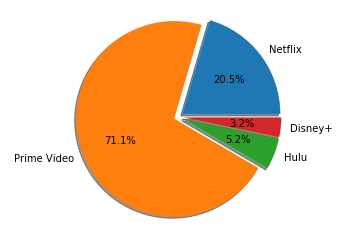

In [11]:
total_netflix_movies = len(netflix_movies['Netflix'])
total_prime_video_movies = len(prime_video_movies['Prime Video'])
total_hulu_movies = len(hulu_movies['Hulu'])
total_disney_movies = len(disney_movies['Disney+'])
labels = ['Netflix','Prime Video','Hulu','Disney+']
sizes = [total_netflix_movies,total_prime_video_movies,total_hulu_movies,total_disney_movies]
explode = (0.05,0.05,0.05,0.05)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

## average movie rating of each platform

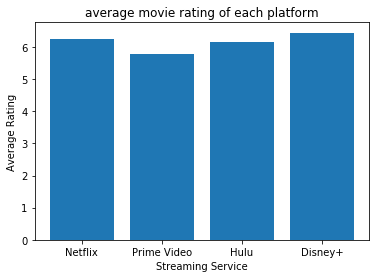

In [12]:
average_netflix_rating = netflix_movies['IMDb'].mean()
average_prime_video_rating = prime_video_movies['IMDb'].mean()
average_hulu_rating = hulu_movies['IMDb'].mean()
average_disney_rating = disney_movies['IMDb'].mean()
y = [average_netflix_rating,average_prime_video_rating,average_hulu_rating,average_disney_rating]
labels = ['Netflix','Prime Video','Hulu','Disney+']
ax = plt.subplot()
plt.bar(x=range(len(y)),height=y)
ax.set_xticks(range(len(y)))
ax.set_xticklabels(labels)
plt.xlabel('Streaming Service')
plt.ylabel('Average Rating')
plt.title('average movie rating of each platform')
plt.show()

## Cuntries with more than 100 occurances in dataframe

In [13]:
top_countries = df.groupby('Country').count().sort_values(by='ID',ascending=False).head(30)
top_countries = top_countries[top_countries['ID']>100]
c = top_countries.index.tolist()
top_countries = c

## average movie rating for top countries

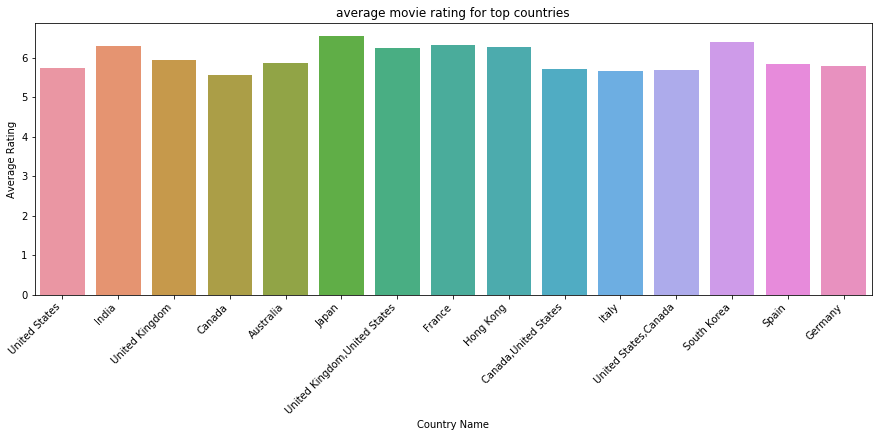

In [14]:
avg_imdb_rating = []
for country in top_countries:
    avg_rating = df[df['Country']==country]['IMDb'].mean()
    avg_imdb_rating.append(avg_rating)

plt.figure(figsize=(15,5))
chart = sns.barplot(data=df,x=top_countries,y=avg_imdb_rating)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('average movie rating for top countries')
plt.xlabel('Country Name')
plt.ylabel('Average Rating')
plt.show()

## Average movie runtime of top countries

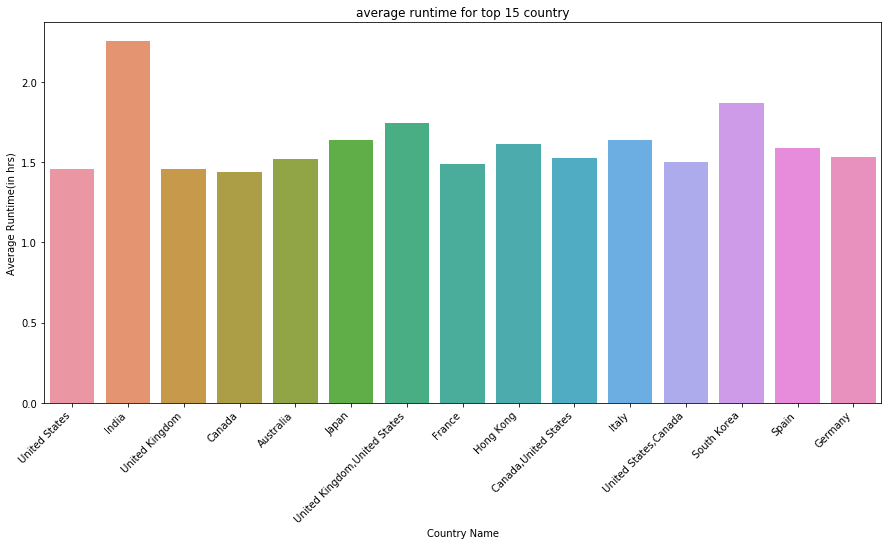

In [15]:
avg_runtime = []
for country in top_countries:
    avg_run = df[df['Country']==country]['Runtime_hrs'].mean()
    avg_runtime.append(avg_run)
    
plt.figure(figsize=(15,7))
chart = sns.barplot(x=top_countries,y=avg_runtime)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('average runtime for top 15 country')
plt.xlabel('Country Name')
plt.ylabel('Average Runtime(in hrs)')
plt.show()

## total good movies on each streaming service(IMDb > 8.0)

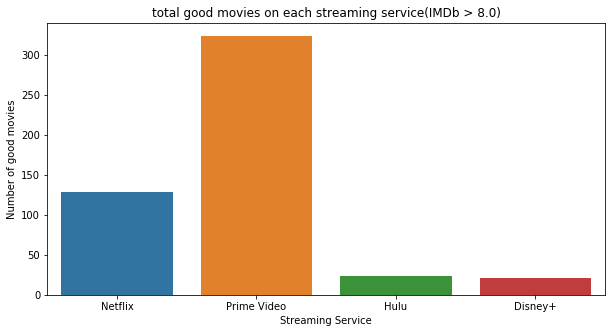

In [16]:
top_netflix_movies = netflix_movies['IMDb']>8.0
top_netflix_movies = top_netflix_movies.sum()
top_prime_video_movies = prime_video_movies['IMDb']>8.0
top_prime_video_movies = top_prime_video_movies.sum()
top_hulu_movies = hulu_movies['IMDb']>8.0
top_hulu_movies = top_hulu_movies.sum()
top_disney_movies = disney_movies['IMDb']>8.0
top_disney_movies = top_disney_movies.sum()

y = [top_netflix_movies,top_prime_video_movies,top_hulu_movies,top_disney_movies]
x = ['Netflix','Prime Video','Hulu','Disney+']
plt.figure(figsize=(10,5))
sns.barplot(x=x,y=y)
plt.title('total good movies on each streaming service(IMDb > 8.0)')
plt.xlabel('Streaming Service')
plt.ylabel('Number of good movies')
plt.show()

## Average rating of each genre

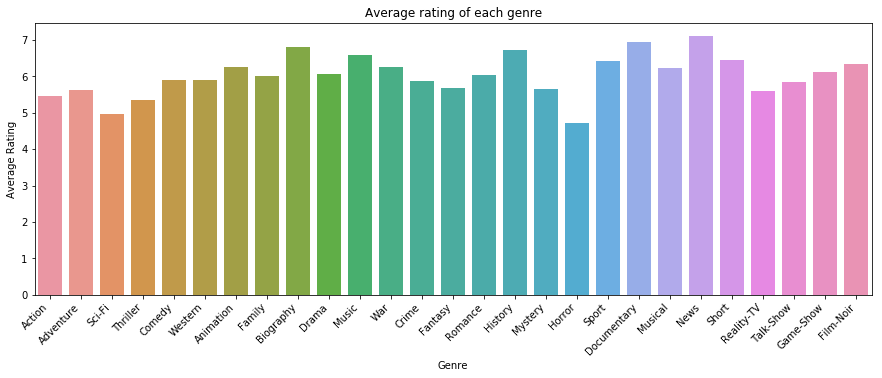

In [17]:
genres = []
for g in range(len(df['Genres'])):
    gen = df['Genres'][g]
    if(type(gen)==str):
        gen = gen.split(',')
        for i in range(len(gen)):
            if(gen[i]  not in genres):
                genres.append(gen[i])
            else:
                continue
y = []
for genre in genres:
    avg_rate = df[df[genre]==1]['IMDb'].mean()
    y.append(avg_rate)
    
plt.figure(figsize=(15,5))
chart = sns.barplot(x=genres,y=y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title('Average rating of each genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

## average rating of every year

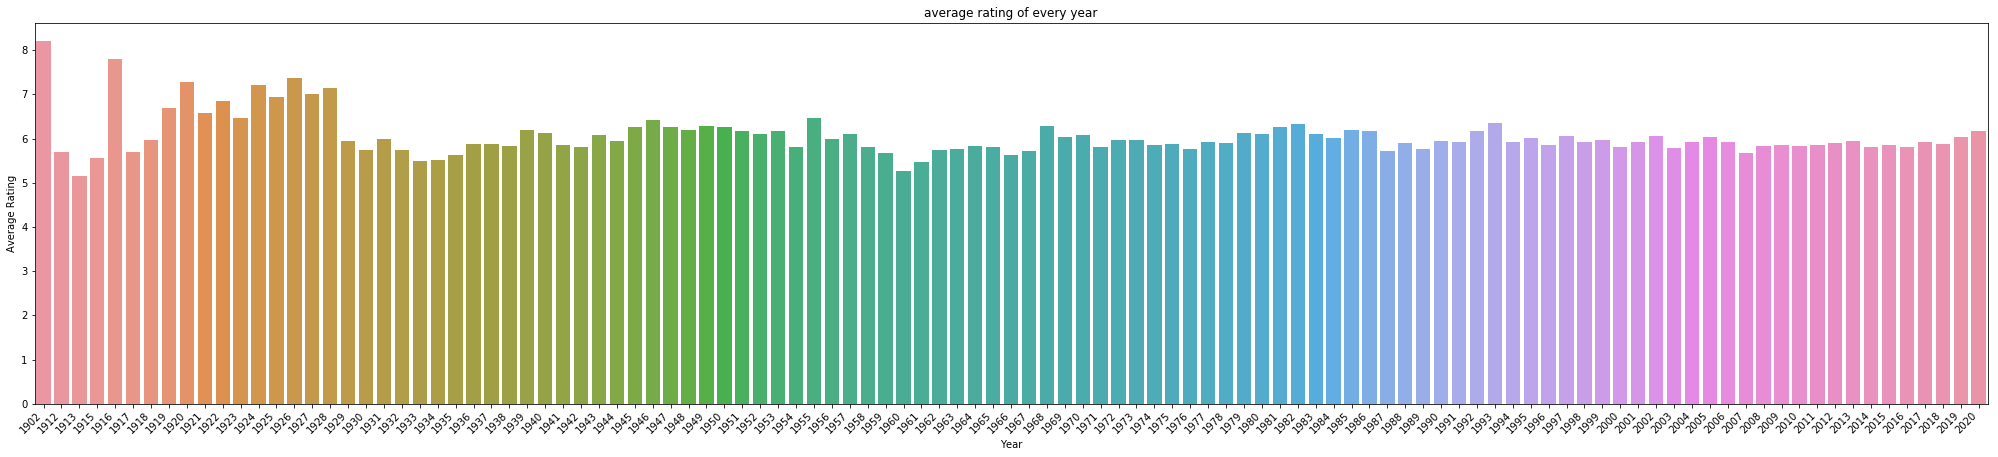

In [18]:
# average rating of every year
avg_rate_year = df.groupby('Year')['IMDb'].mean()
plt.figure(figsize=(35,7))
chart = sns.barplot(data=df,x=avg_rate_year.index,y=avg_rate_year.values)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title('average rating of every year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

## The following function is used to display top rated movies based on your favourite Genres and respective platforms

In [19]:

def top_rated(genre, platform, n_top):
    genre = platform.loc[platform[genre] == 1]

    top_50 = genre.sort_values(by = 'IMDb', ascending = False).head(n_top)

    plt.figure(figsize = (15, 10))
    sns.barplot(data = top_50, y = 'Title', x = 'IMDb', dodge = False)
    plt.legend(loc = 'lower right')
    plt.xlabel('Ratings', FontSize = 25)
    plt.ylabel('Movies', FontSize = 25)
    plt.title('Top {} movies of your favourite genre'.format(n_top))
    plt.show()

No handles with labels found to put in legend.


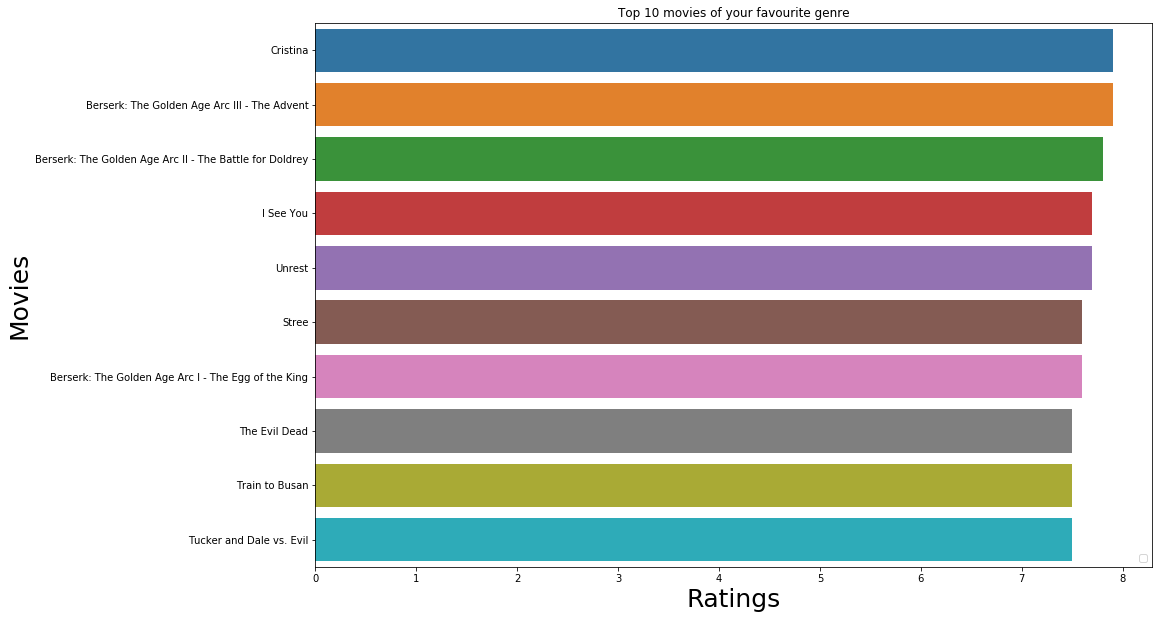

In [20]:
top_rated ('Horror',netflix_movies, 10)

No handles with labels found to put in legend.


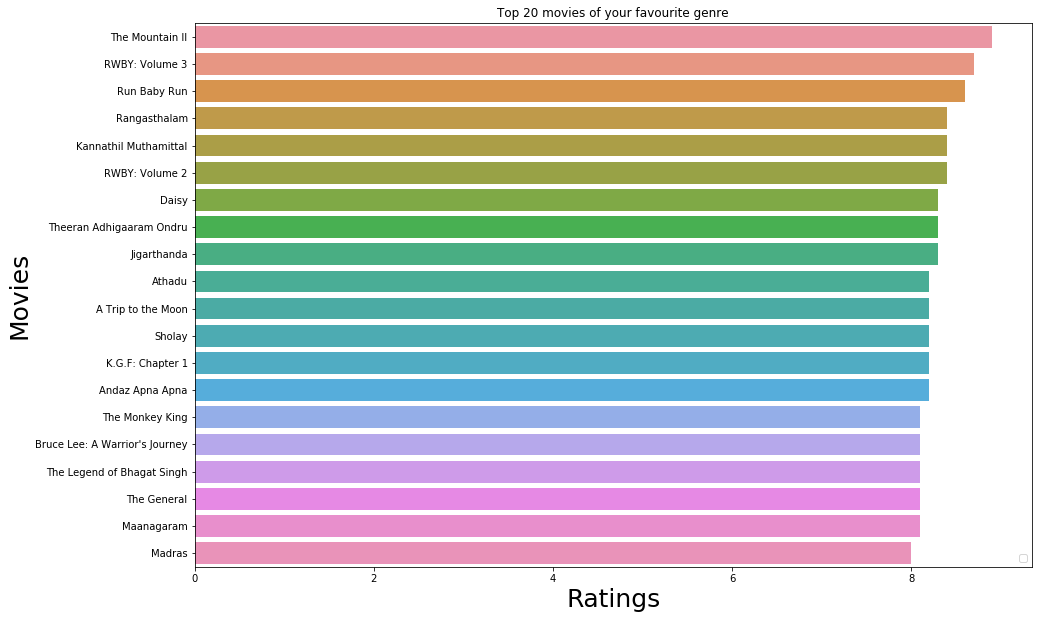

In [21]:
top_rated ('Action',prime_video_movies, 20)